In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.tools.plotting import scatter_matrix

In [2]:
# deterministic random data
np.random.seed(42)

In [3]:
#Loading the training data
train = pd.read_csv("train.csv", index_col = "PassengerId")

In [4]:
train.info()
#Some info are missing (age:714, cabin:204, embarked:889)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


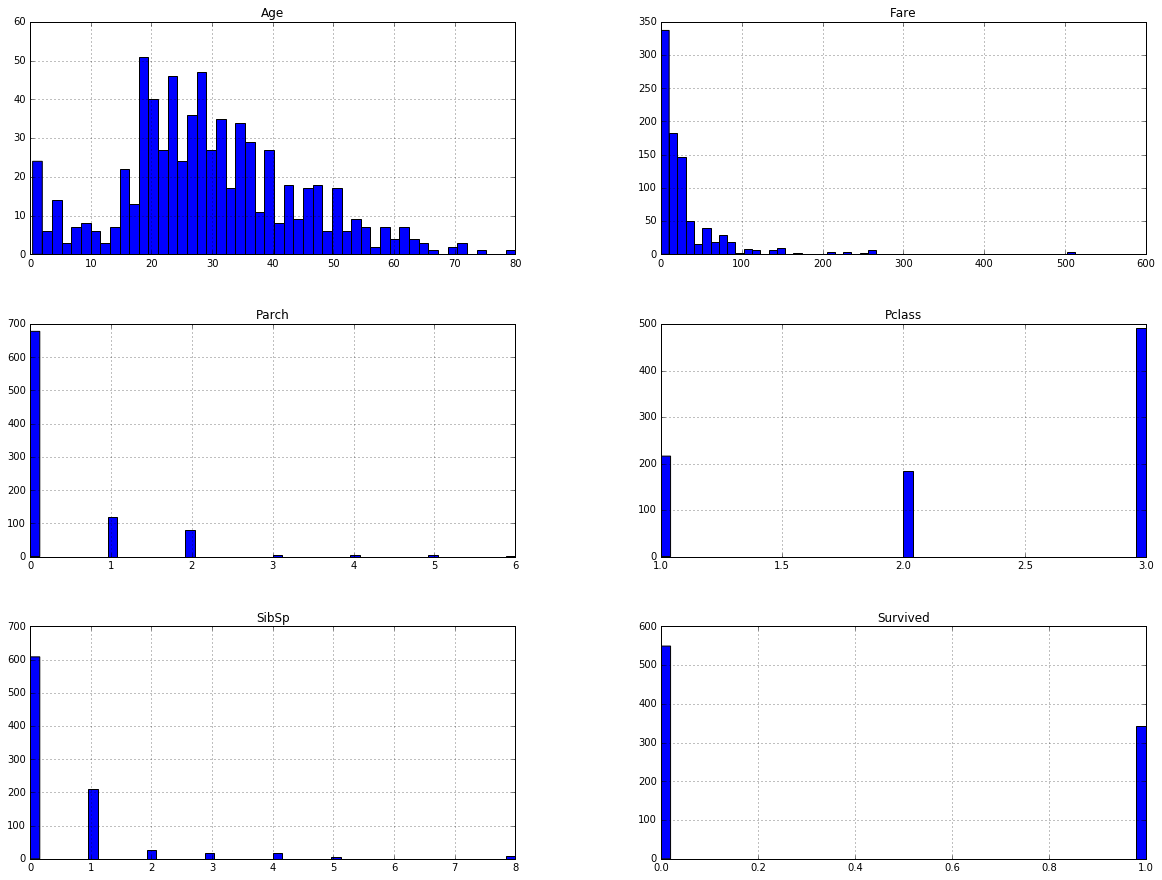

In [5]:
train.hist(bins=50, figsize=(20,15))
plt.show()

In [6]:
#Although there was some element of luck involved in surviving the sinking, 
#some groups of people were more likely to survive than others, such as women, 
#children, and the upper-class. https://www.kaggle.com/c/titanic

#adults
train["age_cat"] = 1
train["age_cat"].where(train["Age"] > 12, 0, inplace=True)
train["age_cat"].where(train["Age"] < 60, 2, inplace=True)
train.groupby("age_cat").count()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
age_cat,,,,,,,,,,,
0,69,69,69,69,69,69,69,69,69,11,69
1,619,619,619,619,619,619,619,619,619,161,618
2,203,203,203,203,26,203,203,203,203,32,202


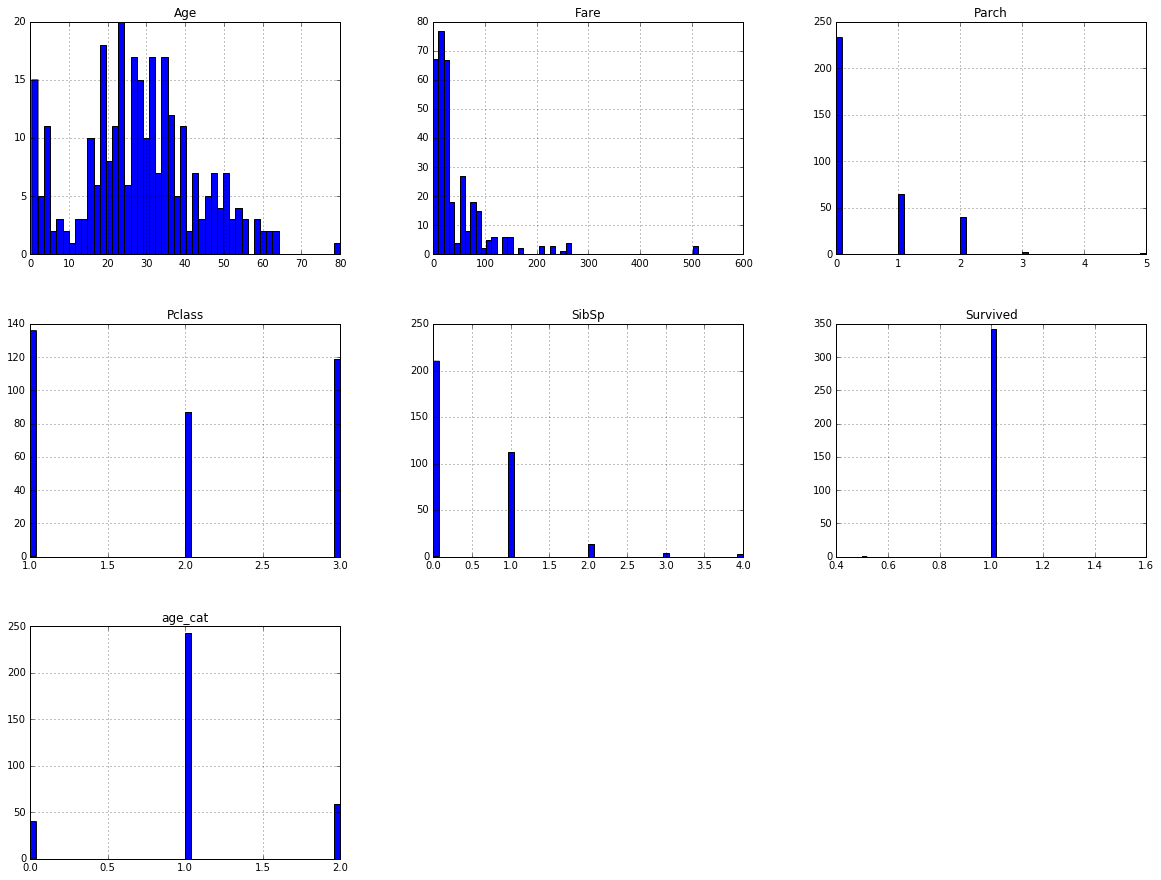

In [7]:
train[train["Survived"] == 1].hist(bins=50, figsize=(20,15))
plt.show()

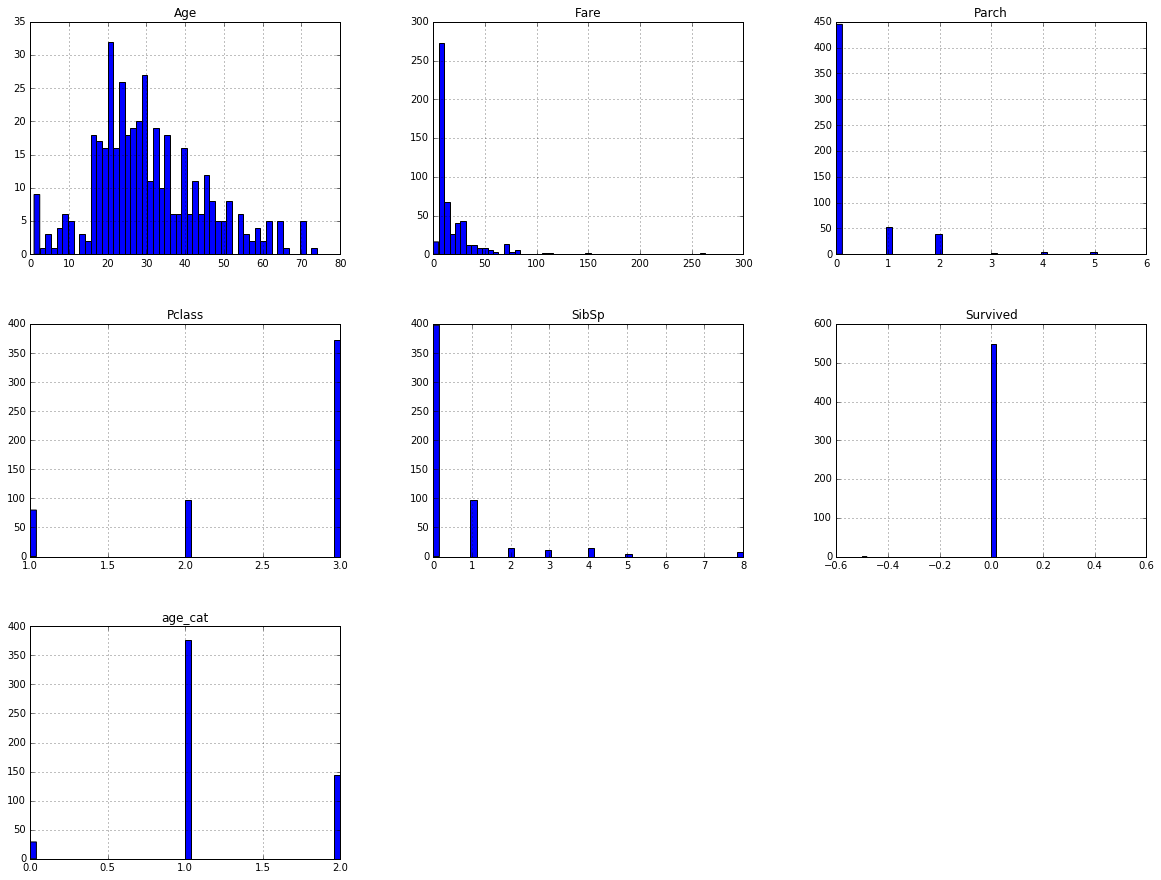

In [8]:
train[train["Survived"] == 0].hist(bins=50, figsize=(20,15))
plt.show()

In [9]:
train[train["Survived"]==1].groupby("age_cat").count()["Survived"]/train[train["Survived"]==0].groupby("age_cat").count()["Survived"]

age_cat
0    1.379310
1    0.646277
2    0.409722
Name: Survived, dtype: float64

In [10]:
train[train["Survived"]==1].groupby("Sex").count()["Survived"]/train[train["Survived"]==0].groupby("Sex").count()["Survived"]

Sex
female    2.876543
male      0.232906
Name: Survived, dtype: float64

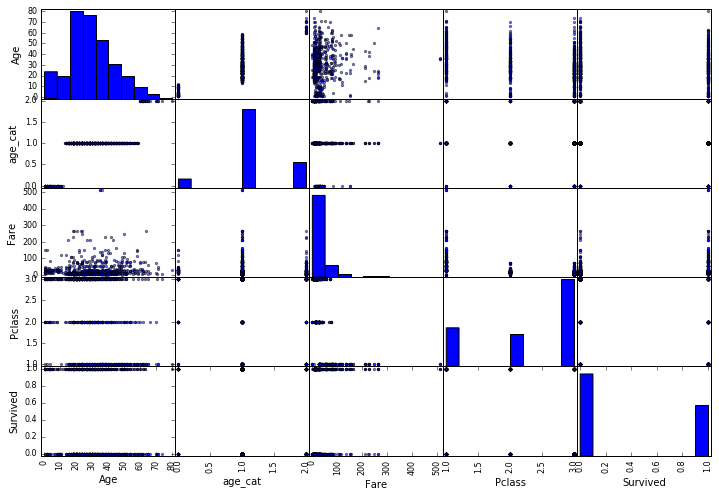

In [11]:
attributes = ["Age", "age_cat", "Fare", "Pclass", "Survived"]
##train[attributes].plot(kind="scatter", x="age_cat", y="Survived", alpha=0.1, figsize=(12, 8))
scatter_matrix(train[attributes], figsize=(12, 8))
plt.show()

In [12]:
train.groupby("Sex").count()

,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,age_cat
Sex,,,,,,,,,,,
female,314,314,314,261,314,314,314,314,97,312,314
male,577,577,577,453,577,577,577,577,107,577,577


In [13]:
train.groupby("Survived").describe()

Age        Fare       Parch      Pclass       SibSp  \
Survived                                                                     
0        count  424.000000  549.000000  549.000000  549.000000  549.000000   
         mean    30.626179   22.117887    0.329690    2.531876    0.553734   
         std     14.172110   31.388207    0.823166    0.735805    1.288399   
         min      1.000000    0.000000    0.000000    1.000000    0.000000   
         25%     21.000000    7.854200    0.000000    2.000000    0.000000   
         50%     28.000000   10.500000    0.000000    3.000000    0.000000   
         75%     39.000000   26.000000    0.000000    3.000000    1.000000   
         max     74.000000  263.000000    6.000000    3.000000    8.000000   
1        count  290.000000  342.000000  342.000000  342.000000  342.000000   
         mean    28.343690   48.395408    0.464912    1.950292    0.473684   
         std     14.950952   66.596998    0.771712    0.863321    0.708688   
         min      0.420000    0.000000    0.000000    1.000000    0.000000   
         25%     19.000000   12.475000    0.000000    1.000000    0.000000   
         50%     28.000000   26.000000    0.000000    2.000000    0.000000   
         75%     36.000000   57.000000    1.000000    3.000000    1.000000   
         max     80.000000  512.329200    5.000000    3.000000    4.000000   

                   age_cat  
Survived                    
0        count  549.000000  
         mean     1.209472  
         std      0.521282  
         min      0.000000  
         25%      1.000000  
         50%      1.000000  
         75%      2.000000  
         max      2.000000  
1        count  342.000000  
         mean     1.055556  
         std      0.535936  
         min      0.000000  
         25%      1.000000  
         50%      1.000000  
         75%      1.000000  
         max      2.000000

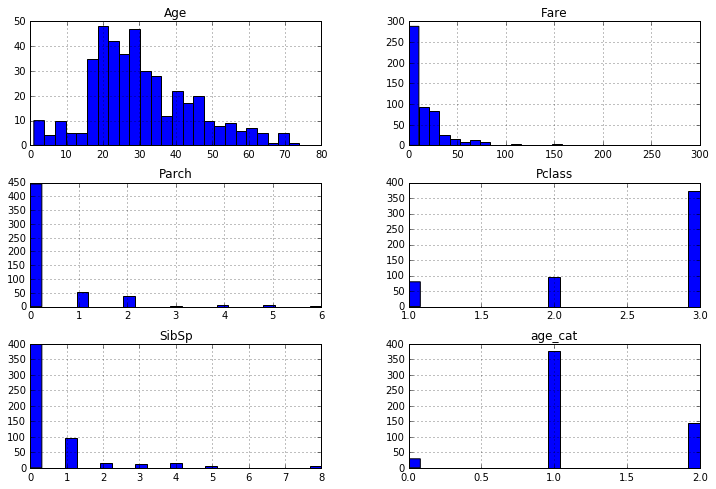

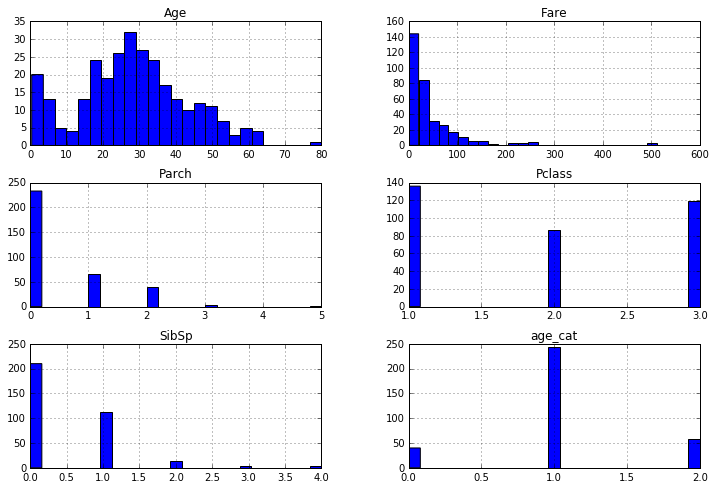

In [14]:
train.groupby("Survived").hist(bins=25,figsize=(12, 8))
plt.show()

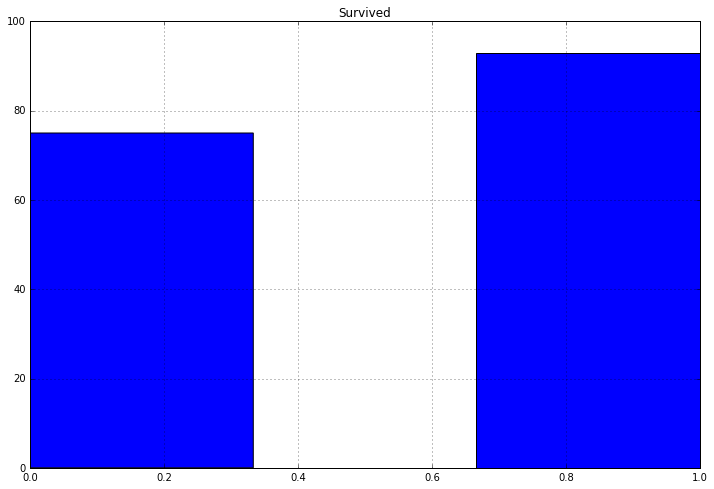

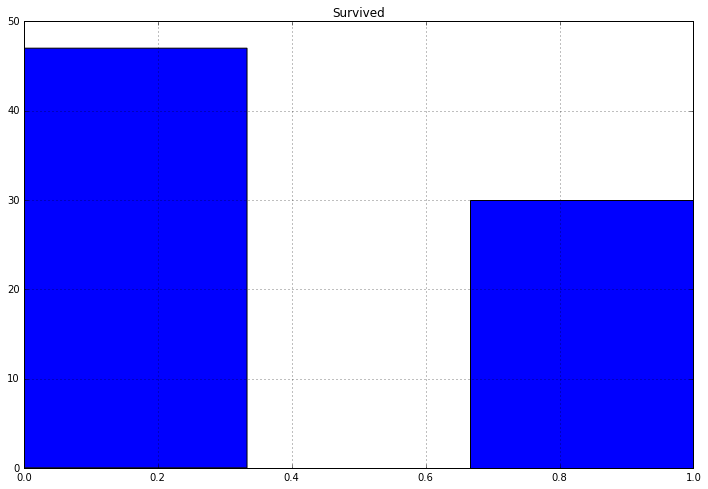

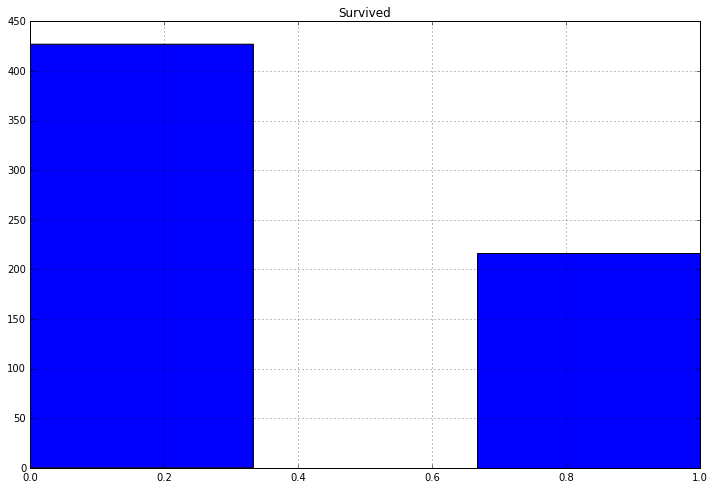

In [15]:
train[["Survived","Embarked"]].groupby("Embarked").hist(bins=3,figsize=(12, 8))
plt.show()

# Data Cleaning/Scaling

preparing the data to train the model

In [16]:
dropped_features = ["Cabin", "Embarked", "Name", "Ticket", "age_cat"]

In [17]:
train_encoded = train.drop(dropped_features, 1)
train_encoded = pd.get_dummies(train_encoded)
age_median = train_encoded["Age"].median()
train_encoded["Age"].fillna(age_median, inplace=True)

In [18]:
train_encoded.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208,0.352413,0.647587
std,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429,0.477990,0.477990
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400,0.000000,0.000000
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,0.000000,1.000000
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000,1.000000,1.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000


In [19]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2, random_state = 42)
train_index, test_index = next(split.split(train, train["Sex"]))

In [20]:
X_train_set, y_train_set = train_encoded.iloc[train_index], train_encoded[["Survived"]].iloc[train_index]
X_test_set, y_test_set = train_encoded.iloc[test_index], train_encoded[["Survived"]].iloc[test_index]

In [21]:
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import f1_score
from sklearn.feature_selection import RFECV

def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

def test_models(X, y):
    sgd_clf = SGDClassifier(random_state=42)
    rfecv = RFECV(estimator=sgd_clf, cv=5, scoring='f1')
    scores = cross_val_score(sgd_clf, rfecv.fit_transform(X, y), y, scoring="f1", cv=5)
    print("\nSGDClassifier - features:%d" % rfecv.n_features_)
    display_scores(scores)

    forest_clf = RandomForestClassifier(random_state=42)
    rfecv = RFECV(estimator=forest_clf, cv=5, scoring='f1')
    scores = cross_val_score(forest_clf, rfecv.fit_transform(X, y), y, scoring="f1", cv=5)
    print("\nRandomForestClassifier:%d" % rfecv.n_features_)
    display_scores(scores)

    log_reg = LogisticRegression(random_state=42)
    rfecv = RFECV(estimator=log_reg, cv=5, scoring='f1')
    scores = cross_val_score(log_reg, rfecv.fit_transform(X, y), y, scoring="f1", cv=5)
    print("\nLogisticRegression:%d" % rfecv.n_features_)
    display_scores(scores)

    softmax_reg = LogisticRegression(solver="lbfgs", C=5, random_state=42)
    rfecv = RFECV(estimator=softmax_reg, cv=5, scoring='f1')
    scores = cross_val_score(softmax_reg, rfecv.fit_transform(X, y), y, scoring="f1", cv=5)
    print("\nsoftmax_reg-LogisticRegression:%d" % rfecv.n_features_)
    display_scores(scores)

    xgb_clf = xgb.XGBClassifier(seed = 42)
    rfecv = RFECV(estimator=xgb_clf, cv=5, scoring='f1')
    scores = cross_val_score(xgb_clf, rfecv.fit_transform(X, y), y, scoring="f1", cv=5)
    print("\nXGBClassifier:%d" % rfecv.n_features_)
    display_scores(scores)
    
    neu_clf = MLPClassifier(random_state=42)
    scores = cross_val_score(neu_clf, X, y, scoring="f1", cv=5)
    print("\nMLPClassifier")
    display_scores(scores)
    
scaler = StandardScaler()

/usr/local/lib/python3.4/dist-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [22]:
train_prepared= scaler.fit_transform(X_train_set.drop("Survived", 1))
test_models(train_prepared, y_train_set["Survived"])


SGDClassifier - features:7
Scores: [ 0.74074074  0.70866142  0.75728155  0.68518519  0.69473684]
Mean: 0.71732114775
Standard deviation: 0.0274338230581

RandomForestClassifier:6
Scores: [ 0.72566372  0.73267327  0.71794872  0.78095238  0.7027027 ]
Mean: 0.731988157149
Standard deviation: 0.0264299331416

LogisticRegression:7
Scores: [ 0.73873874  0.73394495  0.75862069  0.69902913  0.72      ]
Mean: 0.730066701747
Standard deviation: 0.0198506668484

softmax_reg-LogisticRegression:7
Scores: [ 0.73873874  0.73394495  0.75213675  0.69902913  0.72727273]
Mean: 0.730224459698
Standard deviation: 0.0175974153888

XGBClassifier:5
Scores: [ 0.81132075  0.72164948  0.78899083  0.78431373  0.75      ]
Mean: 0.771254958086
Standard deviation: 0.0316317458094


/usr/local/lib/python3.4/dist-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)
/usr/local/lib/python3.4/dist-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)
/usr/local/lib/python3.4/dist-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)



MLPClassifier
Scores: [ 0.78504673  0.74747475  0.7706422   0.75        0.70967742]
Mean: 0.752568219527
Standard deviation: 0.0255095368861


/usr/local/lib/python3.4/dist-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


# XGBClassifier has the best results.
Time to run some GridSearchCV to find the hyperparameters

In [23]:
xgb_clf = xgb.XGBClassifier(seed = 42)
rfecv = RFECV(estimator=xgb_clf, cv=5, scoring='f1')
rfecv.fit(train_prepared, y_train_set["Survived"])
xgb_clf.fit(rfecv.transform(train_prepared), y_train_set["Survived"])
f1_score(xgb_clf.predict(rfecv.transform(train_prepared)), y_train_set["Survived"])

0.83040935672514615

In [24]:
f1_score(xgb_clf.predict(rfecv.transform(scaler.fit_transform(X_test_set.drop("Survived", 1)))), y_test_set["Survived"])

0.76666666666666661

In [25]:
#train_prepared= scaler.fit_transform(train_encoded.drop("Survived", 1))
#xgb_clf.fit(rfecv.transform(train_prepared), train_encoded["Survived"])
#f1_score(xgb_clf.predict(rfecv.transform(train_prepared)), train_encoded["Survived"])

In [26]:
#once a model is build, your kaggle submission can be build - 0.77990
test = pd.read_csv("test.csv", index_col = "PassengerId")
t_encoded = pd.get_dummies(test.drop(["Cabin", "Embarked", "Name", "Ticket"], 1))
age_median = t_encoded["Age"].median()
t_encoded["Age"].fillna(age_median, inplace=True)
fare_median = t_encoded["Fare"].median()
t_encoded["Fare"]=fare_median
test["Survived"] = xgb_clf.predict(rfecv.transform(scaler.fit_transform(t_encoded)))
test['Survived'].to_csv("result_2.csv")

# Setting some hyperparameters
work in progress...

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
parameters = {
 'max_depth':range(3,10,1),
 'min_child_weight':range(1,6,1),
 'learning_rate': [0.1, 0.15, 0.2, 0.25],
 'n_estimators':range(100,200,30)
}

grid_search = GridSearchCV(xgb.XGBClassifier(seed = 42), parameters, cv=5,scoring='f1')
grid_search.fit(poly_features.fit_transform(train_prepared), strat_train_set["Survived"])
clf = grid_search.best_estimator_